# Курс "Введение в анализ данных и машинное обучение"

Курс разбит на пять дней, каждый из дней содержит по шесть блоков. В каждом блоке - три раздела:
- Теоретическое введение,
- Практический пример,
- Заключение.

По дням коротко:
1. Вводный и обзорный день,
2. Разведочный анализ данных и задачи "обучения с учителем" на примерах `scikit-learn`,
3. Задачи "обучения без учителя" и одномерные временные ряды,
4. Нейросети, устройство и применение (изображения, тексты, многомерные временные данные),
5. Методы интерпретации и презентации моделей + два бонусных факультативных раздела курса.

# День первый, обзорный
И сегодня нас ждут следующие темы:
1. Определения и примеры,
2. Элементы теории вероятностей и математической статистики,
3. Немного о том, почему машинное обучение вообще работает,
4. Об инструментарии: `jupyter lab` и `python`,
5. Как делаются исследования в сфере анализа данных, процесс,
6. Обзор дальнейших разделов курса на примерах результатов.

# 1.1 Определения алгоритма, модели, метрик и задач машинного обучения

Формальные определения требуют владения серьезным математическим аппаратом. Мы попробуем обойтись без этого.

Самое первое, из того что нам понадобится, это понятие **датасета** (или *набора данных*). Это прямоугольная таблица значений, каждая строка которой называется **пример**, или же **sample**, а каждая колонка - **признак** или, что то же самое, **feature**.

Индекс примера   | Признак_1 | Признак_2 | Признак_3 | Признак_4 | Признак_5 |
-----------------|-----------|-----------|-----------|-----------|-----------|
 1               | 10        | 20        | "строка 1"| True      | 3.1415926 |   
 2               | 15        | 10        | "строка 2"| False     | 2.71      |
 3               | 12        | 40        | "строка 3"| False     | -1.12345  |

Для **задач обучения с учителем**, один выбранный признак - вся колонка - объявляется как **целевая величина**, или **target** (часто обозначают как `y`), оставшиеся признаки мы так и будем называть признаками (features), их часто обозначают как `X`. 

> В задаче обучения с учителем, необходимо предсказывать целевую величину с помощью входных признаков. Она называется "с учителем", потому что для ряда примеров у нас есть правильные ответы, и на них можно "научиться" предсказывать.
> 
> Для **задач обучения без учителя** - правильных ответов нет, и задача исследователя - найти некоторые полезные структуры в данных. 

Что позволяет научиться машине предсказывать ответы или исследовать данные? 
Снова обойдемся без очень формальных определений, так как приведенные ниже определения сконструированы именно под этот курс.

1. **Модель** - это функция, которая принимает одно или более значений на входе, выдаёт значения на выходе (чаще всего одно - предсказание целевой величины),
2. **Метрика** - это число, получаемое в результате сравнения известных правильных ответов, и тех, которыми отвечает модель. Иногда это можно называть ошибкой модели,
3. **Алгоритм** - это инструкции, которые принимают на вход данные, а выдают на выходе *модель*.

> В машинном обучении существует множество заготовленных *алгоритмов*, которые позволяют *по данным* строить *модели* так, чтобы *ошибка модели* была насколько это возможно меньше.

![Model Diagram](media/diagram_model.svg)

По типу значений *целевого признака* при обучении с учителем, задачи делят на как минимум следующие:
1. Регрессия - когда целевой признак, это любое вещественное число (с запятой), например рост, вес, количество денег,
2. Классификация - когда целевой признак принимает значения из заранее заданного множества (да/нет, собака/кошка/лошадь/...).

## Пример

Давайте рассмотрим пример алгоритма, модели и метрики. В этом разделе уже пойдет код, вдаваться в детали которого мы пока не будем, но в этом же лекционном дне далее станет ясно, что в нём происходит.

> Представим себе ситуацию, когда мы случайно попадаем на необитаемый остров, и видим незнакомый нам фрукт. С легкой руки назовём *мангустин*. Мы попробовали 10 таких фруктов, и составили таблицу.
> 
> Для каждого мангустина, мы некоторым образом знаем его размер в сантиметрах и вес в граммах, а также вкусный он или нет (да/нет).

In [1]:
%matplotlib inline
# магическая команда для отображения диаграмм в jupyter-тетрадках

# импорт библиотек
import numpy as np # библиотека для удобной работы с массивами
import pandas as pd # библиотека для удобной работы с датасетами

import matplotlib.pyplot as plt # библиотека для графики
import seaborn as sns # библиотека для отображения диаграмм

# создадим наш датасет и наполним его синтетическими данными
dataset = pd.DataFrame({
    'weight': np.linspace(50, 125, 10), # 10 записей
    'radius': np.linspace(0.5, 3.5, 10), # еще десять записей,
    'tasty': [False] * 4 + [True, False] + [True] * 4 # наш целевой признак
})

dataset

,weight,radius,tasty
0,50.000000,0.500000,False
1,58.333333,0.833333,False
2,66.666667,1.166667,False
3,75.000000,1.500000,False
4,83.333333,1.833333,True
5,91.666667,2.166667,False
6,100.000000,2.500000,True
7,108.333333,2.833333,True
8,116.666667,3.166667,True
9,125.000000,3.500000,True


Все наши знания о мангустинах приведены в этой таблице. Нам надо использовать некоторый алгоритм, который создаст модель для предсказания по размеру и весу - будет ли мангустин вкусным.
Сначала отобразим наши данные на плоскости, возможно это позволит сделать некоторые предположения.

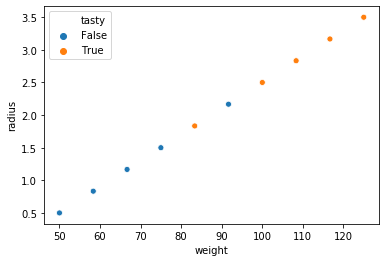

In [2]:
sns.scatterplot(x="weight", y="radius", hue="tasty", data=dataset); # зададим что по осям и что брать за цвет

Уже из данной диаграммы видно, что чем больше размер и вес, тем мангустин ***обычно*** вкуснее, но есть и исключения. Мы не будем особо мудрствовать, и используем следующий метод для построения модели

1. Модель - пусть это функция `tasty = f(weight, radius) > threshold = weight * a + radius * b > threshold`, где `a`, `b`, и `threshold` - называются параметрами модели,
2. Метрика (ошибка модели) - количество *неправильно* классифицированных примеров,

Алгоритм будет следующим: 
- `a = (max(weight) - min(weight)) / количество записей`, 
- `b = (max(radius) - min(radius)) / количество записей`,
- `threshold` находится перебором с шагом 1 по всем записям, лучшим считается тот, который дает минимум нашей метрике.

In [5]:
# наша арифметическая модель
def model(weight, radius, a, b, threshold):
    return weight * a + radius * b > threshold

# подсчет метрики как суммы несовпадающих ответов
# True соответствует 1, False соответствует 0
def metric(y_true, y_predicted):
    return sum(y_true != y_predicted)

def algorithm_create_model(data):
    # здесь .max и .min - это всей колонке нашей таблицы
    a = (data.weight.max() - data.weight.min()) / len(data)
    b = (data.radius.max() - data.radius.min()) / len(data)
    
    best_metric = np.inf # инициализируем бесконечностью
    best_threshold = None
    
    # перебор будем вести до максимума значений до сравнения
    model_maximum = data.weight.max() * a + data.radius.max() * b
    
    # для каждого порога
    for threshold in np.arange(0, model_maximum, 1.):
        y_predicted = []
        for index in range(len(data)): # пройдем по всем примерам
            predicted = model(
                data.weight.values[index],
                data.radius.values[index],
                a, b, threshold
            )
            # подсчитаем прогноз модели
            y_predicted.append(predicted)
        
        # подсчитаем метрику по всем примерам
        current_metric = metric(
            y_true=data.tasty, 
            y_predicted=y_predicted
        )
        
        # сверим, дает ли текущий порог лучше качество
        # и сохранием его, если так
        if current_metric < best_metric:
            best_metric = current_metric
            best_threshold = threshold
            
            print("Порог %.1f дал улучшение, неправильных ответов %d" % (
                threshold, current_metric
            ))
            
    return [a, b, best_threshold]
            
algorithm_create_model(dataset)

Порог 0.0 дал улучшение, неправильных ответов 5
Порог 376.0 дал улучшение, неправильных ответов 4
Порог 438.0 дал улучшение, неправильных ответов 3
Порог 501.0 дал улучшение, неправильных ответов 2
Порог 563.0 дал улучшение, неправильных ответов 1


[7.5, 0.3, 563.0]

### ВАЖНО!

> Мы "обучили" модель на всех доступных данных, и мы НЕ можем быть уверенными, что она их просто не запомнила.
> Чтобы быть до некоторой степени уверенным, мы должны проверять качество модели на отложенном тестовом множестве.

Перемешаем данные и проверим предсказания на трех отложенных мангустинах.

In [6]:
data = dataset.copy().sample(
    frac=1.,  # выберем все записи в случайном порядке
    random_state=4 # зафиксируем генератор случайных чисел для воспроизводимости
)

# отложим наши множества, в тестовом будет только три случая с конца
train = data[:-3]
test = data[-3:]

a, b, threshold = algorithm_create_model(data)
"Количество неправильных предсказаний из 3 тестовых: %d" % metric(
    test.tasty,
    model(test.weight, test.radius, a, b, threshold)
)

Порог 0.0 дал улучшение, неправильных ответов 5
Порог 376.0 дал улучшение, неправильных ответов 4
Порог 438.0 дал улучшение, неправильных ответов 3
Порог 501.0 дал улучшение, неправильных ответов 2
Порог 563.0 дал улучшение, неправильных ответов 1


'Количество неправильных предсказаний из 3 тестовых: 1'

Как видим, наша модель ошибается в 1 случае из 3. Можно догадаться, что она ошибается в том случае, когда метки нарушают возрастающий порядок в размерах и весе мангустина.

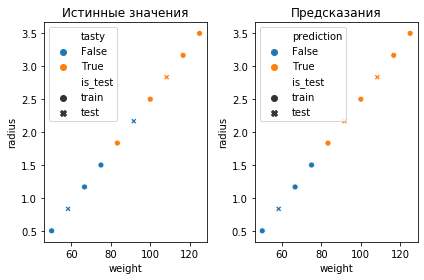

In [15]:
# посмотрим как предсказывает наша модель все данные и отобразим наши множества разными маркерами

plt.subplot(1, 2, 1);
plt.title("Истинные значения");
sns.scatterplot(x="weight", y="radius", hue="tasty", style="is_test", data=pd.DataFrame({
    "weight": data.weight,
    "radius": data.radius,
    "tasty": data.tasty,
    "is_test": [
        "test" if sample_index in test.index else "train" for sample_index in data.index
    ]
}));

plt.subplot(1, 2, 2);
plt.title("Предсказания");
sns.scatterplot(x="weight", y="radius", hue="prediction", style="is_test", data=pd.DataFrame({
    "weight": data.weight,
    "radius": data.radius,
    "prediction": model(data.weight, data.radius, a, b, threshold),
    "is_test": [
        "test" if sample_index in test.index else "train" for sample_index in data.index
    ]
}));

plt.tight_layout();

## Заключение

В данном курсе мы в основном не будем составлять собственные алгоритмы, а будем пользоваться уже готовыми. Их много, и работают они хорошо в разных случаях. За каждым из них стоит некоторая своя *интуиция*, как в случае алгоритма выше стояла следующая: чем выше размер и вес мангустина - тем он, начиная с некоторого порога, вкусный. 

Другие данные могут давать (совсем) другие подсказки, и поэтому мы уделим внимание и разведочному анализу данных, цель которого - найти эти подсказки в данных и выбрать алгоритм получше. 

Также из основного, следует понимать, что **мы обязаны** проверять качество на тех данных, которые модель не видела, что избежать самообмана. Модели, как и люди, могут запоминать правильные ответы (и далее мы даже увидим построенный на это алгоритм), и ничего ***не обобщать*** *(no generalization)*. Отсутствие обобщения - это то, чего мы будем избегать, стараясь при этом минимизировать ошибку.

# 1.2 Элементы теории вероятностей и математической статистики

Начнем с того, что всё что случайно, как ни странно, случайно по-разному. Например, и монетка, и игральный кубик - с равной вероятностью выдают свои исходы. Но, например, попадание выпущенной из лука стрелой "в десяточку" - тяготеет все же к этой самой десяточке, хотя и случайным образом в неё иногда не попадает.

Как и в случае с алгоритмами и моделями, мы в рамках этого курса не будем вдаваться во все математические детали определений (хотя они очень важны). Ограничимся лишь тем, что нам потребуется.

**Случайная величина** - это величина, принимающая какой-либо исход из множества для неё возможных. Например, случайная величина на `(0, 1)` принимает значения только из этого интервала (*непрерывная* случайная величина, её исходы всегда между нулем и единицей). Или, случайная величина может принимать два исхода `{-1; 1}` - *дискретная* случайная величина.

**Вероятность** - это число от 0 до 1 (включительно), характеризующее, условно, как часто мы в конкретный исход попадём, или же насколько *мы верим* в то, что он произойдет (это так, если мы еще ни разу не проводили испытаний).

> Например, для дискретной величины `{-1, 1}`, если вероятность для `-1` равна `0.3`, мы будем считать что это означает, что в 100 испытаниях нам выпадет `-1` как раз 30 раз.
> Для непрерывной, вероятность определяется не в точке, а в луче: вероятность что `величина < 0.5` равна `0.3`, означает что в точках менее 0.5 величина будет в 3 случаях из 10.

Формально, определения немного (если не сказать совершенно) другие. Но для наших нужд такого подхода будет достаточно.

**Функция распределения случайной величины** - описывает как раз все вероятности для всех исходов. То есть `0 < F(x) < 1`, для любого `x` из множества исходов величины. 

Давайте на примерах.

Посмотрим на *равномерно* распределенную на (0, 1) случайную величину. Равномерно, это означает что чем длинее отрезок, тем пропорционально выше вероятность попасть в него.

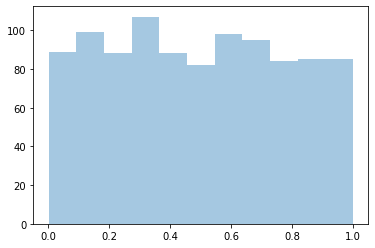

In [16]:
X = [] # массив, где будут наши случайные величины

for index in range(1000): # цикл от 0 до 999
    X.append(np.random.uniform())
    
# и отобразим количество попаданий точки это величины
sns.distplot(
    X,
    kde=False # не делать оценку функции распределения
);

Рассмотрим распределенную на (-Infinity, +Infinity) случайную величину, со средним значением в числе 10, и такую чтобы её значения с 95%-вероятностью попадали в диапазон от +5 до +15. 

Для того, чтобы значения *нормально распределенной случайной величины* (это значит функция распределения имеет определенный заданный вид, пока не суть какой) в 95% случаев лежали в заданном диапазоне `(среднее - L, среднее + L)`, нужно задать её *стандартное отклонение* как `L / 2`.

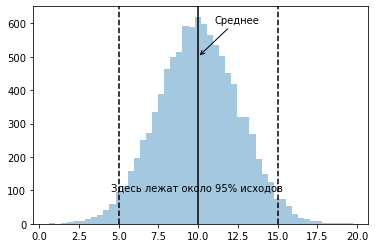

In [28]:
X = [] # массив, где будут наши случайные величины

for index in range(10000): # цикл от 0 до 9999
    X.append(np.random.normal(
        10, # среднее
        2.5 # это половина ширины диапазона        
    ))

# и отобразим количество попаданий точки это величины
sns.distplot(
    X,
    kde=False # не делать оценку функции распределения
);

plt.axvline(10, 0, 1, ls='-', c='black');
plt.axvline(5, 0, 1, ls='--', c='black');
plt.axvline(15, 0, 1, ls='--', c='black');

plt.annotate("Среднее", (10, 500), (11, 600), arrowprops={"arrowstyle": '->'});
plt.annotate("Здесь лежат около 95% исходов", (4.5, 100));

In [29]:
# Подсчитаем процент попавших в диапазон от +5 до +15 точек
sum([1 if x >= 5 and x <= 15 else 0 for x in X]) / len(X)

0.9528

Случай дискретных величин выглядит слегка вырожденно.

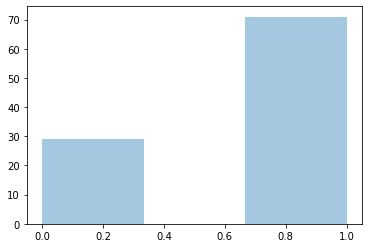

In [30]:
X = []

for index in range(100):
    x = 1 if np.random.uniform() > 0.3 else 0
    X.append(x)
    
sns.distplot(X, kde=False);

**Задача теории вероятностей** - это уметь описывать случайные величины.

**Задача математической статистики** - обратная. По выборке из случайных значений, определить что это за величина (её свойства).
Любая функция от выборки - например среднее значение, или самое часто встречающееся (в статистике - *мода*), - называется *статистикой*.

Анализ данных и машинное обучение - это в некотором смысле продолжение статистики, так как мы по случайной выборке (датасету) должны установить зависимость между признаками и целевой величиной.

## Пример

Представим, что у нас есть замеры роста 300 человек. Мы не знаем что это за случайная величина, но мы можем рассмотреть её различные описательные статистики, и что-то сказать о её поведении.

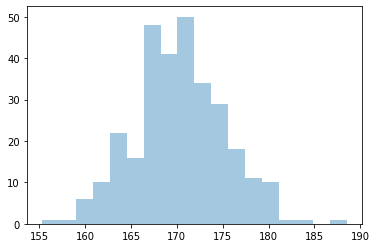

In [31]:
height = [
    np.random.normal(170, 5) for _ in range(300) # синтетические данные
]

sns.distplot(height, kde=False);

### Описательные статистики

In [32]:
pd.DataFrame({'height' : height}).describe().T

,count,mean,std,min,25%,50%,75%,max
height,300.0,170.315178,4.984322,155.29278,167.089041,170.28729,173.367197,188.513387


Здесь мы видим:
- количество (count) записей,
- среднее (mean) для всех замеров роста,
- стандартное отклонение (std) - для нормального распределения, 95% данных лежат в интервале (`среднее - 2 * стандартное отклонение`, `среднее + 2 * стандартное отклонение`),
- 25% данных ниже значения, указанного в столбце 25%
- аналогично с другими процентными значениями (эти статитистики называются процентилями),
- минимум и максимум по всем данным.

### Три важных теоремы

**Закон больших чисел**: если все случайные величины у нас независимы и одинаково распределены, то ***выборочное среднее*** стремится при увеличении числа испытаний к ***математическому ожиданию***.

Математическое ожидание - это взвешенные по вероятностям исходы, то есть

`математическое ожидание = вероятность исхода 1 * значение исхода 1 + вероятность исхода 2 * значение исхода 2 + ....`

По сути, это означает, что в условиях незнания среднего по всем возможным ситуациям (по "всем данным в мире"), мы можем при большом количестве данных заменить его выборочным средним. В нашем при мере с ростом, это означает, что средний рост по всё более увеличивающейся выборке будет ближе к некоторому истинному значению (по "всем данным в мире").

**Центральная предельная теорема**: для независимых случайных величин из одного распределения со средним `M` и стандартным отклонением `S`, их выборочное среднее стремится при увеличении количества испытаний `n` - к нормальному распределению с тем же средним и разбросом `S * S / n`.

Возвращаясь к нашему примеру с ростом, это означает, что по мере роста выборки, средний рост будет распределен как нормальная случайная величина, и чем точнее нам нужно его измерять - тем больше данных нам нужно.

**Условная вероятность и теорема Байеса**

Тут мы подходим к одному из краеугольных камней машинного обучения. Начнем с двух вопросов:
1. Насколько вероятно, что через час будет дождь?
2. Насколько вероятно, что через час будет дождь, если он уже идёт?

Без математики понятно, что речь идёт о разных ситуациях, что в математике формализуют как *условную вероятность* (определение):

`P(A|B) = P(через час пойдет дождь|дождь идёт сейчас) = P(вероятность что через час будет дождь И сейчас идёт дождь) / P(дождь идёт сейчас)`.

Практически из определения, вытекает **теорема Байеса**:

`P(A|B) = P(B|A) * P(A) / P(B)`.

В терминах дождей, это означает, что 

`вероятность что дождь будет через час, если он идёт сейчас = вероятность дождя сейчас, если он будет через час * вероятность дождя через час / вероятность дождя сейчас`.

В данном примере мы ничего не выигрываем от теоремы, но давайте рассмотрим другую, более практическую задачу.

Есть две корзины с печеньем:
1. В первой 30 ванильных и 10 шоколадных,
2. Во второй - 20 ванильных и 20 шоколадных.

Мы в темноте вытаскиваем наугад из какой-то корзины ванильное печение. Какова вероятность, что мы вытащили её из первой?

> Жизненный опыт подсказывает, что возможно всего из первой, так как в ней больше ванильных. Посмотрим, что скажет теорема Байеса.

In [35]:
prior = 1 / 2 # вытаскиваем из случайной корзины. это наше A

likelihood = 3 / 4 # вероятность ванильной печеньки в первой корзине. это наше P(B|A)

evidence = (30 + 20) / (20 + 20 + 30 + 10) # вероятность вытащить ванильную печеньку вообще из всех корзин. P(B)

posterior = prior * likelihood / evidence

assert posterior == 3 / 5 # выбросим ошибку, если равенство не выполняется
posterior

0.6

Это конечно замечательно, что мы можем сказать *вероятность*, конечно, но какая польза от всего этого? А польза в рамках анализа данных и машинного обучения, следующая. Задачу машинного обучения часто ставят как поиск параметров, таких что:

`максимум вероятности получить (параметры | датасета)`, и поскольку такую вероятность мы сами по себе не знаём, то "проворачивают ручку Байеса":

`вероятность (параметры | данные) = вероятность данных при параметрах * вероятность параметров / вероятность данных`. 

При максимизации вероятности слева, знаменатель справа не меняется (он не зависит от параметров модели). Если говорить простыми словами - при машинном обучении часто ищутся те параметры модели, которые имеют максимальную вероятность для имеющегося датасета.

## Заключение

Мы не будем напрямую пользоваться указанными теоремами. Нам важно следующее следствие: 

> Чем больше в выборке наблюдений, тем лучше можно оценивать характеристики процесса генерации "всех данных в мире" (*data generation process*). Но поскольку у нас есть только выборка, то инструменты математической статистики очень пригождаются в анализе данных и машинном обучении.

# 1.3 А теперь... почему всё это работает

> Если вы до этого чего-то не поняли, или вообще ничего не поняли, не расстраивайтесь. 
>
> Сейчас будет еще сложнее. 
> 
> Обрадую - после этого будет всё только практика, и сравнительно легко по сравнению с тем, о чем будет сейчас.

### Probability-almost-correct (PAC-) обучаемость

Всё это конечно замечательно, запустить алгоритм на данных, который нам выдаст модель, которая уловила в данных какие-то закономерности с некоторой ошибкой... А что если данных много, они большие, и их вообще человеку не понять? Не будем же мы проверять каждый ответ руками, смысл?

**Вопрос**: можем ли мы верить моделям даже в пределах их ошибки?

**Ответ**: да, но не всегда.

Что вообще означает, что алгоритм может выдать обучившуюся модель? Пусть у нас есть некоторый алгоритм, который выдал на данных нам модель, которая работает с некоторой ошибкой.

Рассмотрим следующие понятия:
- Ошибка генерализации - среднее значение ошибки на всех данных в мире. Мы её не знаем на самом деле.
- Ошибка модели на тренировочном/тестовом множестве - среднее значение ошибки на выбранном известном множестве.
- Желательно бы построить такую модель, которая будучи обученной на известном множестве, имела бы **минимальную ошибку генерализации**. 

Алгоритм называется PAC-обучаемым, если 
1. Выбрав порог ошибки `E`, например не более 1% в среднем от любых входных данных,
2. Фиксируя нашу уверенность `P` (это некоторая вероятность),
3. Будет иметь место факт: существует количество данных `n`, выше которого вероятность ошибки выше `E` ниже `1 - P`.

> То есть, алгоритм выдаёт такую модель, которая даёт ошибку в `1 - P` случаев выше чем `E`, начиная с некоторого числа примеров `n`. 

Рассмотрим пример с ростом человека. Есть все люди мира, какие только могут быть, у нас же только ограниченная выборка, по которой мы можем делать выводы. Так вот, представим что мы предсказываем вес человека по росту, и:
1. Мы хотим ошибаться не более чем на 1 килограмм,
2. Вероятность, что наша модель будет ошибаться более чем на 1 килограмм пусть будет 0.01 (одна сотая),
3. Тогда для PAC-обучаемого алгоритма существует такое число данных, которое позволит нам достичь этих требований. 

Существует даже формула на такой размер данных. Но она нам не нужна, все равно мы тут данные не генерируем :)

In [105]:
# один из примеров такой формулы.
# конкретно эта работает только в случае конечного числа моделей

def estimate_size(models_number, E, P):
    return int(abs(np.log(models_number / P) / E)) + 1

("Для 150 моделей (по две точки из 300) из примера про рост и вес, нужно минимум данных: %d" % estimate_size(150, 1, 0.01),
"Для 300 * 300 моделей из примера про рост и вес, нужно минимум данных: %d" % estimate_size(300 ** 2, 1, 0.01))

('Для 150 моделей (по две точки из 300) из примера про рост и вес, нужно минимум данных: 10',
 'Для 300 * 300 моделей из примера про рост и вес, нужно минимум данных: 17')

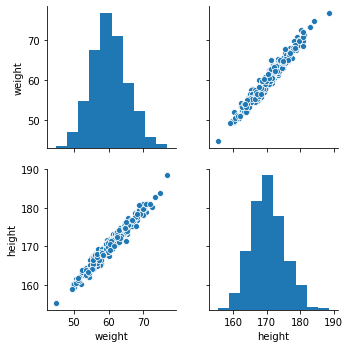

In [106]:
weight = [
    sample - 110 - np.random.normal(0, 1) for sample in height
]

sns.pairplot(data=pd.DataFrame({'weight': weight, 'height': height}));

In [108]:
# импортируем алгоритм, строящий линейные модели
# y = k1 * x1 + k2 * x2 + ... + b
from sklearn.linear_model import LinearRegression

# импортируем подсчет средней абсолютной ошибки
from sklearn.metrics import mean_absolute_error

print("""
Учимся на увеличивающемся количестве точек по 1000 раз,
качество проверяем на "всех данных в мире" - усредняем
""")
for number_points in range(2, 21):
    errors = []
    for index in range(1000):
        random_indices = np.random.randint(
            0, len(weight),
            size=number_points
        )
        yhat = LinearRegression().fit(
            np.array(height).reshape(-1, 1)[random_indices],
            np.array(weight)[random_indices]
        ).predict(
            np.array(height).reshape(-1, 1)
        )
        errors.append(
            mean_absolute_error(weight, yhat)
        )
    print("Точек %d, ошибка %.1f килограмм, за пределами ошибки в единицу %.1f%% моделей" % (
        number_points,
        np.mean(errors),
        100 * sum([1 if error > 1. else 0 for error in errors]) / len(errors)
    ))


Учимся на увеличивающемся количестве точек по 1000 раз,
качество проверяем на "всех данных в мире" - усредняем

Точек 2, ошибка 4.1 килограмм, за пределами ошибки в единицу 81.0% моделей
Точек 3, ошибка 1.4 килограмм, за пределами ошибки в единицу 63.8% моделей
Точек 4, ошибка 1.2 килограмм, за пределами ошибки в единицу 50.5% моделей
Точек 5, ошибка 1.0 килограмм, за пределами ошибки в единицу 37.6% моделей
Точек 6, ошибка 1.0 килограмм, за пределами ошибки в единицу 30.5% моделей
Точек 7, ошибка 0.9 килограмм, за пределами ошибки в единицу 23.1% моделей
Точек 8, ошибка 0.9 килограмм, за пределами ошибки в единицу 16.8% моделей
Точек 9, ошибка 0.9 килограмм, за пределами ошибки в единицу 14.4% моделей
Точек 10, ошибка 0.9 килограмм, за пределами ошибки в единицу 11.2% моделей
Точек 11, ошибка 0.9 килограмм, за пределами ошибки в единицу 9.5% моделей
Точек 12, ошибка 0.9 килограмм, за пределами ошибки в единицу 7.4% моделей
Точек 13, ошибка 0.9 килограмм, за пределами ошибки в единицу

Формула так себе: количество моделей подсчитать трудно. Да и не нужно. Как видим, приемлемая ошибка - гораздо раньше оценки.

**И тут возникает вопрос... когда алгоритм является PAC-обучаемым?**

В курсе мы будем работать только с PAC-обучаемыми алгоритмами. PAC-обучаемость для алгоритмов устанавливается путем проверки его `VC-размерности` (*размерности Вапника-Червоненкинса*) на конечность.

**VC-размерность** — это число, максимальный размер датасета, который алгоритм сможет разделить всеми возможными способами на две части. Если `VC-размерность` алгоритма конечна, то он является `PAC-обучаемым`.

Пример вычисления размерности: линией на плоскости можно разделить датасет из трёх точек на две части. Чтобы разделить датасет из четырех точек на две части, одной линии уже недостаточно. Следовательно, размерность такого алгоритма для плоскости равна 3 (конечна).

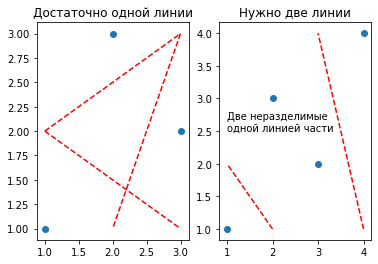

In [60]:
plt.subplot(1, 2, 1);
plt.title('Достаточно одной линии');
plt.scatter([1, 2, 3], [1, 3, 2]);
plt.plot([1, 3], [2, 1], c='red', ls='--');
plt.plot([1, 3], [2, 3], c='red', ls='--');
plt.plot([3, 2], [3, 1], c='red', ls='--');
plt.subplot(1, 2, 2);
plt.title('Нужно две линии');
plt.scatter([1, 2, 3, 4], [1, 3, 2, 4]);
plt.plot([2, 1], [1, 2], c='red', ls='--');
plt.plot([4, 3], [1, 4], c='red', ls='--');
plt.annotate("Две неразделимые\nодной линией части", (1, 2.5));

Как ни странно, все эти знания нам в ближайшей пятидневной практике не понадобятся. Однако из всей этой теории (статистического обучения) вытекает следующее.

1. Алгоритмы - работают! Правда, с некоторого количества примеров.
2. Работают не все алгоритмы. Существует теорема "Нет бесплатных завтраков" (`no free lunch`-теорема), которая говорит, что универсальный алгоритм всегда потерпит неудачу (найдутся для него примеры). То есть мы должны "подтолкнуть" алгоритм некоторым знанием о задаче к решению.
3. Ошибку следует рассматривать из двух компонент: **ошибку аппроксимации** (*смещение*) и **ошибку оценивания** (*разброс*). На этом остановимся подробнее в виде примера.

> Вспомним, что мы можем выбирать алгоритмы. Пока неважно какие. Они могут давать разные множества моделей (как по количеству, так и по их сложности).

**Ошибка смещения** - это ошибка выбора класса алгоритма, возникает когда алгоритм не может приблизить данные достаточно. В зависимости от данных, она может существовать всегда.

**Ошибка разброса** - это ошибка, возникающая вследствие того, что созданная алгоритмом модель - является только приближением к некоторой "идеальной" модели, но не является ей.

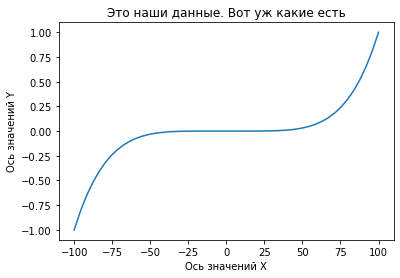

In [202]:
X = np.linspace(-100, 100)

Y = [
    x ** 5 / 100 ** 5  for x in X 
]

plt.title("Это наши данные. Вот уж какие есть");
plt.plot(X, Y);
plt.xlabel("Ось значений X");
plt.ylabel("Ось значений Y");

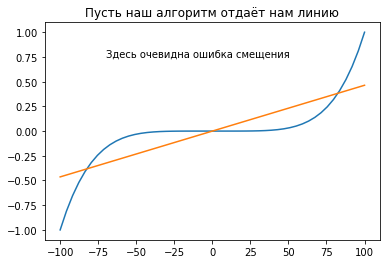

In [203]:
yhat = LinearRegression().fit(
    np.array(X).reshape(len(X), 1), # здесь мы подстраиваем данные под формат
    np.array(Y).reshape(len(Y), 1) # библиотеки scikit-learn, о которой конечно же поговорим
).predict(np.array(X).reshape(len(X), 1))

plt.title('Пусть наш алгоритм отдаёт нам линию');
plt.plot(X, Y);
plt.plot(X, yhat);
plt.annotate("Здесь очевидна ошибка смещения", (-70, 0.75));

"Подтолкнём" наш алгоритм ближе к задаче, дав возможность использовать различные степени X.

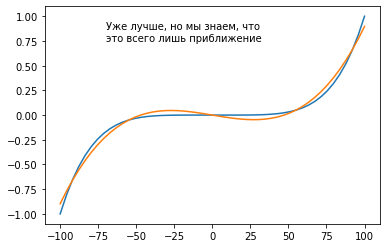

In [206]:
max_power = 4

X_powered = [
    [(x ** power) for power in range(1, max_power + 1)] for x in X
]

yhat = LinearRegression().fit(
    np.array(X_powered).reshape(len(X_powered), max_power),
    np.array(Y).reshape(len(Y), 1)
).predict(np.array(X_powered).reshape(len(X_powered), max_power))

plt.plot(X, Y);
plt.plot(X, yhat);
plt.annotate("Уже лучше, но мы знаем, что\nэто всего лишь приближение", (-70, 0.75));

Обогатим наш алгоритм и дадим возможность использовать (только) большие степени.

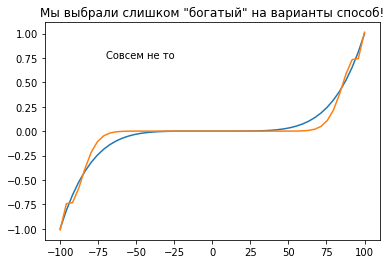

In [209]:
min_power = 18
max_power = 24

X_new = np.array([
    [(x ** power) for power in range(min_power, max_power + 1)] for x in X
]).reshape(len(X), -1)

yhat = LinearRegression().fit(
    X_new, np.array(Y).reshape(-1, 1)
).predict(X_new)

plt.title('Мы выбрали слишком "богатый" на варианты способ!');
plt.plot(X, Y);
plt.plot(X, yhat);
plt.annotate("Совсем не то", (-70, 0.75));

## Заключение

Резюмируя этот наш раздел, важно знать вот что.
1. Алгоритмы, которые мы будем в дальнейшем использовать, разные.
2. Соответственно, ошибаются они тоже по-разному.

Иногда им "не хватает сил", чтобы подойти под данные, иногда "сил у них перебор". Когда мы будем рассматривать конкретные практические алгоритмы, мы узнаем, что можно с этим делать. 

> На этом поздравляю! Самое сложное в курсе уже пройдено. Дальше будет только практика, практика, и еще раз практика (которая критерий истины).

---

# 1.4 Инструментарий аналитика данных: python и jupyter lab

Для анализа данных можно использовать различные языки и инструменты, например язык `R`, визуальный инструмент `Dataiku`. В сфере программного обеспечения часто можно найти множество альтернативных решений под каждую задачу.

Мы выбираем `python` и среду разработки `Jupyter Lab` не просто потому что они популярные. Популярность - это следствие наличия серьезной *экосистемы*, то есть набора инструментов и пакетов. `python` для анализа данных стал особо популярен в результате усилий Google и Facebook, которые выпустили большие полезные библиотеки для работы с данными. `Jupyter Lab` - это один самых частых инструментов ввиду своей простоты и при этом - удобства работы.

Все вот эти тетрадки были созданы с помощью `Jupyter Lab`, и его использует в практике очень много аналитиков. Так же как и `python`, порог вхождения у которого не запредельный, а возможности, как у универсального языка с "кучей батареек" - практически неограничены (по-крайней мере для типичных задач).

## python crash course

In [62]:
# переменные - ссылки на значения

string_variable = "Это строка"
integer_variable = 42 # целое число
float_variable = 3.14 # вещественное число

string_variable, integer_variable, float_variable

('Это строка', 42, 3.14)

In [63]:
# Кортеж - упорядоченный неизменяемый список значений

tuple_example = (1, 23, "Хопа")
tuple_example

(1, 23, 'Хопа')

In [65]:
# Список - изменяемый набор значений

list_example = [1, 2, 3, 4, 5]

# список можно "срезать" по индексам
# индексы всегда начинаются с нуля!

list_example[2], list_example[:2], list_example[-2:], list_example[::2]

(3, [1, 2], [4, 5], [1, 3, 5])

In [66]:
# словарь - множество пар "ключ -> значение"

dict_example = {
    'серебряный': 100.100,
    'золотой': 200.200
}

dict_example['серебряный'], dict_example.get('платиновый', 'значение по умолчанию')

(100.1, 'значение по умолчанию')

In [67]:
# элементам списков и словарей можно присваивать значения

dict_example['платиновый'] = list_example[2] = 159

list_example, dict_example

([1, 2, 159, 4, 5], {'серебряный': 100.1, 'золотой': 200.2, 'платиновый': 159})

In [69]:
# функции... это почти то же, что и в математике - выход для входа
# а точнее - обособленный блок кода с параметрами

def function(x, a, b):
    y = x * a + b
    return y

function(1, 10, 20)

30

In [70]:
# класс - это описание объекта
# любой объект может иметь свойства и методы

# тут проще на примере

class ExampleClass:
    def __init__(self, a, b):
        """
        Такой метод называется конструктор
        """
        
        # self - внутрення ссылка на текущий объект
        self.a, self.b = a, b

    def function(self, x):
        return self.a * x + self.b
    
# создадим объект - экземпляр класса
example_object = ExampleClass(20, 30)

# и вызовем его метод
example_object.function(1)

50

Как ни странно - это практически всё, что нам понадобится. Помимо этого, нам еще понадобится импорт библиотек, а вот в них уже "кладези всяких полезностей". Выше мы видели, в какие чудеса они умеют, всё делают за нас, надо их только попросить :)

In [71]:
# вариант импорта из недр библиотеки
import sklearn.datasets as datasets

# другой вариант импорта 
from sklearn.cluster import KMeans

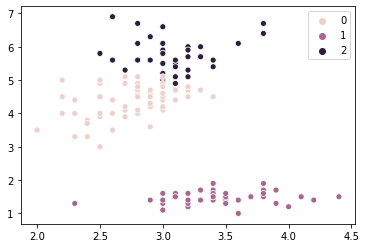

In [73]:
# ну и продолжим, раз начали :)

# загрузим датасет из библиотеки
X, y = datasets.load_iris(return_X_y=True)

# KMeans - это класс с методами
clusterer = KMeans(n_clusters=3).fit(X)

# запись X[:, 1] - означает взять ВТОРУЮ колонку массива
sns.scatterplot(x=X[:,1], y=X[:,2], hue=clusterer.labels_);

## Заключение

`python` активно развивается. Из основных новшеств - это добавление спецификаций типов в объявления переменных (везде, где они объявляются). Мы пока это не используем, чтобы не усложнять код. Но выглядит это вот так (хотите - пользуйтесь, но потом не жалуйтесь:)). Учтите, эти подсказки по типам, в `python 3.6` на самом деле ни на что не влияют.

In [84]:
def example(a: float = None, b: float = 0) -> float:
    if a is not None:
        return a + b
    return None

example(), example(0), example(0, 1)

(None, 0, 1)

In [85]:
example("2a", "3a")

'2a3a'